In [1]:
import tensorflow as tf
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# Load models
vgg16 = tf.keras.models.load_model("Models/VGG16_ArtStyleClass.keras")
resnet50 = tf.keras.models.load_model("Models/ResNet50V2_ArtStyleClass.keras")

2024-03-17 19:02:05.890460: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-03-17 19:02:05.890481: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-03-17 19:02:05.890487: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-03-17 19:02:05.890539: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-17 19:02:05.890575: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
style_labels = {
    'Abstract Art': 0,
    'Cubism': 1,
    'Expressionism': 2,
    'Impressionism': 3,
    'Realism': 4
}

In [5]:
expressionism_img = Image.open("Images/IMG_3386.jpg")
expressionism_img  = expressionism_img .convert('RGB')
expressionism_img  = expressionism_img .resize((224, 224))
expressionism_img_array = np.asarray(expressionism_img ) / 255

abstract_img = Image.open("Images/abstract.jpeg")
abstract_img = abstract_img.convert('RGB')
abstract_img = abstract_img.resize((224, 224))
abstract_img_array = np.asarray(abstract_img) / 255

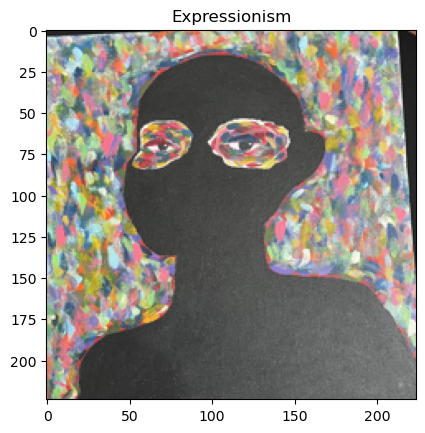

In [6]:
plt.imshow(expressionism_img_array)
plt.title('Expressionism')
plt.show()

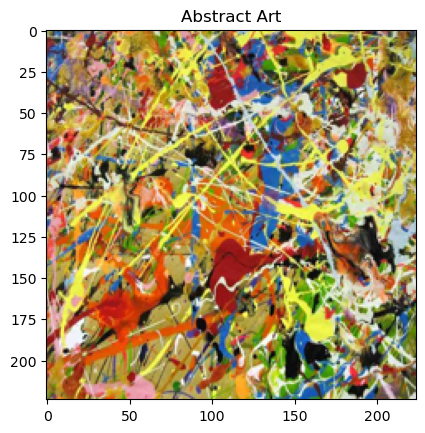

In [7]:
plt.imshow(abstract_img_array)
plt.title('Abstract Art')
plt.show()

In [8]:
# For Expressionism

expressionism_img_batch = np.expand_dims(expressionism_img_array, axis=0)
prediction_vgg16 = vgg16.predict(expressionism_img_batch)
vgg16_class = np.argmax(prediction_vgg16, axis=1)

prediction_resnet = resnet50.predict(expressionism_img_batch)
resnet50_class = np.argmax(prediction_resnet, axis=1)

2024-03-17 19:03:12.912334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step


In [9]:
vgg16_pred = vgg16_class[0]
resnet_pred = resnet50_class[0]

vgg16_predicted_style_label = [label for label, index in style_labels.items() if index == vgg16_pred][0]
resnet_predicted_style_label = [label for label, index in style_labels.items() if index == resnet_pred][0]

print(f"VGG16 prediction: {vgg16_predicted_style_label}")
print(f"ResNet50 prediction: {resnet_predicted_style_label}")
print("The painting is an Expressionism painting")

VGG16 prediction: Expressionism
ResNet50 prediction: Impressionism
The painting is an Expressionism painting


In [10]:
# For Abstract Art

abstract_img_batch = np.expand_dims(abstract_img_array, axis=0)
prediction_vgg16 = vgg16.predict(abstract_img_batch)
vgg16_class = np.argmax(prediction_vgg16, axis=1)

prediction_resnet = resnet50.predict(abstract_img_batch)
resnet50_class = np.argmax(prediction_resnet, axis=1)

1/1 [==============================] - 0s 28ms/step


In [11]:
vgg16_pred = vgg16_class[0]
resnet_pred = resnet50_class[0]

vgg16_predicted_style_label = [label for label, index in style_labels.items() if index == vgg16_pred][0]
resnet_predicted_style_label = [label for label, index in style_labels.items() if index == resnet_pred][0]

print(f"VGG16 prediction: {vgg16_predicted_style_label}")
print(f"ResNet50 prediction: {resnet_predicted_style_label}")
print("The painting is an Abstract Art painting")

VGG16 prediction: Abstract Art
ResNet50 prediction: Impressionism
The painting is an Abstract Art painting


### Live Demo

In [12]:
img = Image.open("Images/new_form.jpeg")
img = img.convert('RGB')
img = img.resize((224, 224))
img_array = np.asarray(img) / 255

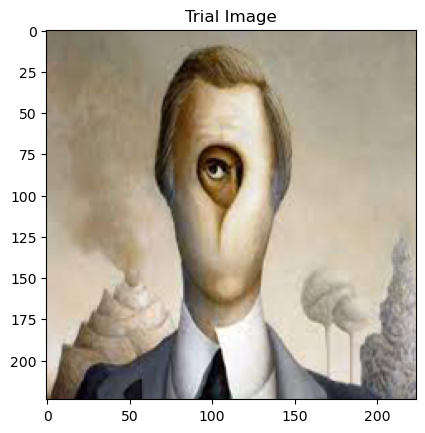

In [13]:
plt.imshow(img_array)
plt.title('Trial Image')
plt.show()

In [14]:
img_batch = np.expand_dims(img_array, axis=0)
prediction_vgg16 = vgg16.predict(img_batch)
vgg16_class = np.argmax(prediction_vgg16, axis=1)

prediction_resnet = resnet50.predict(img_batch)
resnet50_class = np.argmax(prediction_resnet, axis=1)

1/1 [==============================] - 0s 25ms/step


In [15]:
vgg16_pred = vgg16_class[0]
resnet_pred = resnet50_class[0]

vgg16_predicted_style_label = [label for label, index in style_labels.items() if index == vgg16_pred][0]
resnet_predicted_style_label = [label for label, index in style_labels.items() if index == resnet_pred][0]

print(f"VGG16 prediction: {vgg16_predicted_style_label}")
print(f"ResNet50 prediction: {resnet_predicted_style_label}")

VGG16 prediction: Expressionism
ResNet50 prediction: Expressionism
